# Ergodicity and S&P500
S&P500 is not ergodic. Let's verify this.

If it was ergodic then we would have `Geometric Average Annual Return (geometric_mean)` = `Compound Annual Growth Rate (CAGR)`

Heuristic:
* `geometric_mean` is analogous to the ensemble average.
* `CAGR` is the time average.

In [1]:
import numpy as np
import pandas as pd

# Prepare Data
Datasource [Berkshire Hathaway via Business Insider](https://www.businessinsider.com/personal-finance/average-stock-market-return)

In [2]:
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
return_pct =[15.1, 2.1, 16, 32.4, 13.7, 1.4, 12, 21.8, -4.4, 31.5]
d = {'year':year,'return_pct':return_pct}
df = pd.DataFrame(d)

In [3]:
df['return_multiple'] = 1 + df.return_pct/100

Let's say we invest $100 at the beginning of 2020:

In [4]:
initial_value = 100
df['investment_value'] = df.return_multiple.cumprod()*initial_value

In [5]:
df

,year,return_pct,return_multiple,investment_value
0,2010,15.1,1.151,115.100000
1,2011,2.1,1.021,117.517100
2,2012,16.0,1.160,136.319836
3,2013,32.4,1.324,180.487463
4,2014,13.7,1.137,205.214245
5,2015,1.4,1.014,208.087245
6,2016,12.0,1.120,233.057714
7,2017,21.8,1.218,283.864296
8,2018,-4.4,0.956,271.374267
9,2019,31.5,1.315,356.857161


# Calculate Return

In [6]:
# Calculate Geometric Mean
geometric_mean = df.return_pct.mean()/100

In [7]:
# Calculate CAGR
final_value = df.investment_value.iloc[-1]
years = len(df.year)
CAGR = (final_value/initial_value)**(1/years)-1

In [8]:
print("Geometric Annual Yearly Mean:"+"{0:.2%}".format(geometric_mean))
print("Compount Annual Growth Rate: "+"{0:.2%}".format(CAGR))

Geometric Annual Yearly Mean:14.16%
Compount Annual Growth Rate: 13.57%


# Apply those returns

Suppose we invested at CAGR return each year:

In [9]:
df['CAGR'] = CAGR
df['CAGR_value'] = (1+df.CAGR).cumprod()*initial_value

In [10]:
df['geometric_mean'] = geometric_mean
df['geometric_mean_value'] = (1+df.geometric_mean).cumprod()*initial_value

In [11]:
value_df = df.loc[:,['investment_value','CAGR_value','geometric_mean_value']]
value_df

,investment_value,CAGR_value,geometric_mean_value
0,115.100000,113.566291,114.160000
1,117.517100,128.973024,130.325056
2,136.319836,146.469880,148.779084
3,180.487463,166.340410,169.846202
4,205.214245,188.906633,193.896424
5,208.087245,214.534256,221.352158
6,233.057714,243.638598,252.695624
7,283.864296,276.691318,288.477324
8,271.374267,314.228067,329.325713
9,356.857161,356.857161,375.958234


# Plot

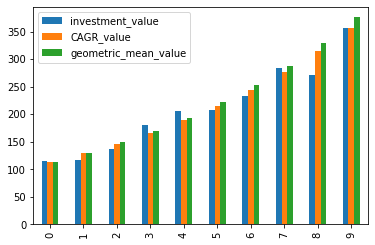

In [12]:
value_df.plot(kind='bar')

# Conclusion
S&P500 Investors care about GAGR return, not average return (geometric).
* Average return (geometric) will always be higher due to Jensen's inequality.

### Jensen's Inequality Explanation (Incomplete)
* Convex Functions:
    * Volatility raises the value of convex functions
    * `t*f(x1)+(1-t)*f(x2) >= f(t*x1+(1-t)*x2)` if f is a convex function
    * i.e. average of function > function of average

See the function `return_ratio` below:
* For CAGR you apply `return_ration` first and then separate stuff out
* For Geometric mean you separate stuff out ant then apply `return_ratio`

In [13]:
def return_ratio(start_value, end_value):
    return (end_value/start_value)